Rows: 4801 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): BROKERTITLE, TYPE, ADDRESS, STATE, MAIN_ADDRESS, ADMINISTRATIVE_AR...
dbl  (6): PRICE, BEDS, BATH, PROPERTYSQFT, LATITUDE, LONGITUDE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


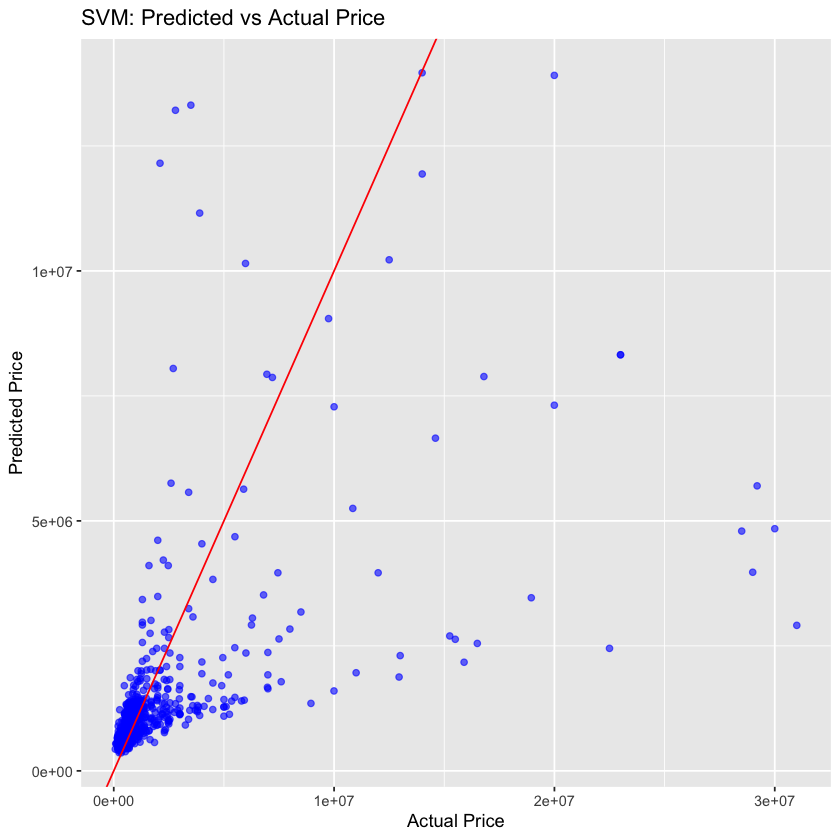

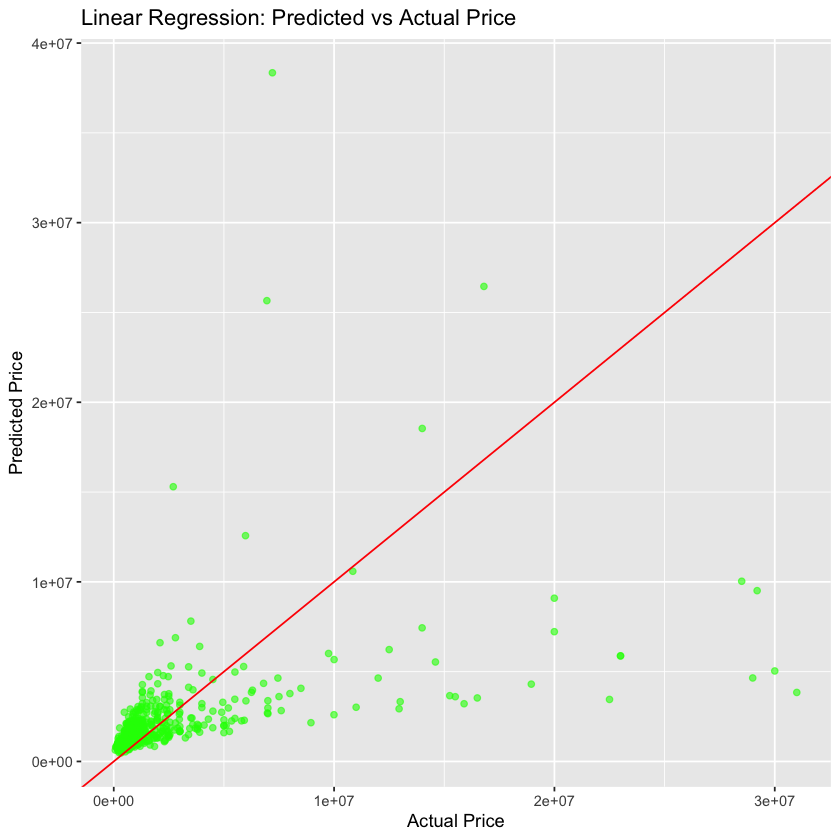

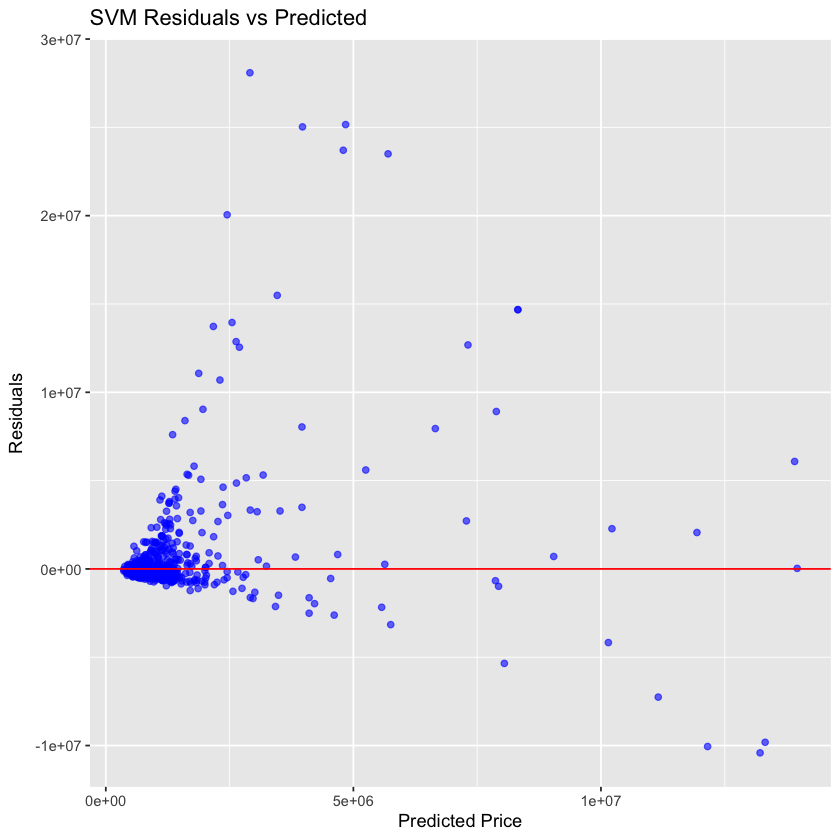

SVM RMSE: 3326140 
Linear RMSE: 3507905 
SVM R²: 0.3247887 
Linear R²: 0.2300539 


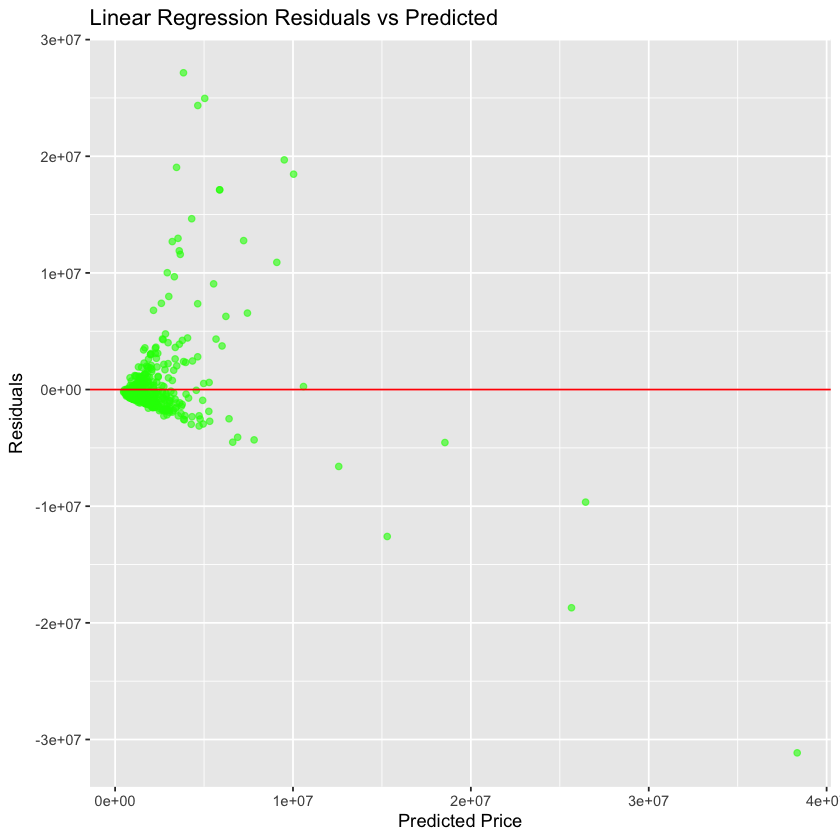

In [3]:
# Load libraries
library(e1071)
library(ggplot2)
library(dplyr)

# Load and preprocess data
NY_House_Dataset <- read_csv("NY-House-Dataset.csv")
dataset <- NY_House_Dataset %>%
  filter(PRICE < 195000000, PROPERTYSQFT != 2184.207862) %>%  # Remove outliers
  select(PRICE, PROPERTYSQFT) %>%
  na.omit()

# Split data (80/20)
set.seed(123)
train_index <- sample(1:nrow(dataset), 0.8 * nrow(dataset))
train <- dataset[train_index, ]
test <- dataset[-train_index, ]

# --- 1. SVM Regression (Unscaled) ---
svm_model <- svm(PRICE ~ PROPERTYSQFT, data = train, kernel = "radial")
test$svm_pred <- predict(svm_model, test)

# --- 2. Linear Regression ---
lm_model <- lm(PRICE ~ PROPERTYSQFT, data = train)
test$lm_pred <- predict(lm_model, test)

# --- 3. Predicted vs. Real Price Plots (Unscaled) ---
# SVM Plot
ggplot(test, aes(x = PRICE, y = svm_pred)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  ggtitle("SVM: Predicted vs Actual Price") +
  xlab("Actual Price") + ylab("Predicted Price")

# Linear Plot
ggplot(test, aes(x = PRICE, y = lm_pred)) +
  geom_point(color = "green", alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  ggtitle("Linear Regression: Predicted vs Actual Price") +
  xlab("Actual Price") + ylab("Predicted Price")

# --- 4. Residual Plots vs. Predictions ---
test$svm_residuals <- test$PRICE - test$svm_pred
test$lm_residuals <- test$PRICE - test$lm_pred

# SVM Residuals
ggplot(test, aes(x = svm_pred, y = svm_residuals)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_hline(yintercept = 0, color = "red") +
  ggtitle("SVM Residuals vs Predicted") +
  xlab("Predicted Price") + ylab("Residuals")

# Linear Residuals
ggplot(test, aes(x = lm_pred, y = lm_residuals)) +
  geom_point(color = "green", alpha = 0.6) +
  geom_hline(yintercept = 0, color = "red") +
  ggtitle("Linear Regression Residuals vs Predicted") +
  xlab("Predicted Price") + ylab("Residuals")

# --- 5. Model Comparison Metrics ---
cat("SVM RMSE:", sqrt(mean(test$svm_residuals^2)), "\n")
cat("Linear RMSE:", sqrt(mean(test$lm_residuals^2)), "\n")
cat("SVM R²:", cor(test$PRICE, test$svm_pred)^2, "\n")
cat("Linear R²:", cor(test$PRICE, test$lm_pred)^2, "\n")

# Residual Plots Comparison

The residual plots for the SVM and linear regression models highlight key differences in their predictive performance:

- **SVM Model**: 
  - Residuals are tightly clustered around zero, with most errors falling between -1e7 and 1e7.
  - Shows a slight funnel shape (heteroscedasticity), where errors increase slightly with higher predicted prices.
  - Demonstrates better handling of non-linear relationships in the data.

- **Linear Regression Model**:
  - Residuals span a much wider range (-3e7 to 3e7), indicating larger prediction errors.
  - Clear heteroscedastic pattern - errors grow significantly as predicted prices increase.
  - Struggles to model the underlying relationships, especially for higher-priced properties.

The SVM's superior performance is evident from:
1. Smaller overall residual magnitudes
2. More consistent error distribution across price ranges
3. Better handling of the data's non-linear characteristics

This aligns with the quantitative metrics (lower RMSE, higher R² for SVM), confirming it as the better model for this housing price prediction task.